# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [8]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.jpg')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

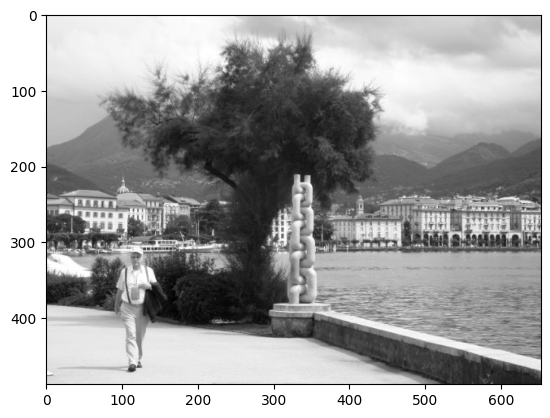

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [10]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)
V=VT.T

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

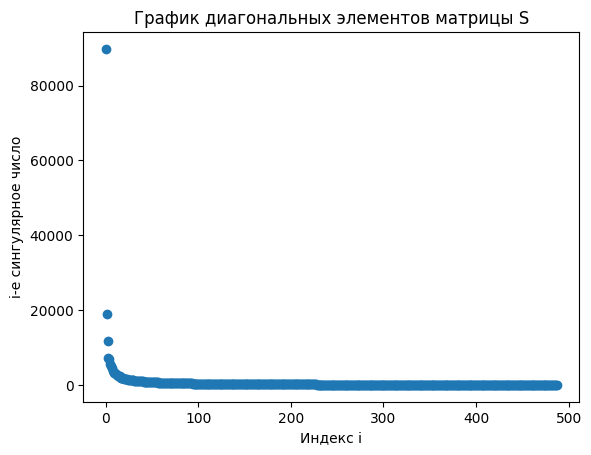

In [11]:
n=S.shape[0]
plt.scatter([i for i in range(n)],[S[i] for i in range (n)])
plt.xlabel('Индекс i')
plt.ylabel('i-е сингулярное число')
plt.title('График диагональных элементов матрицы S')
plt.show()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

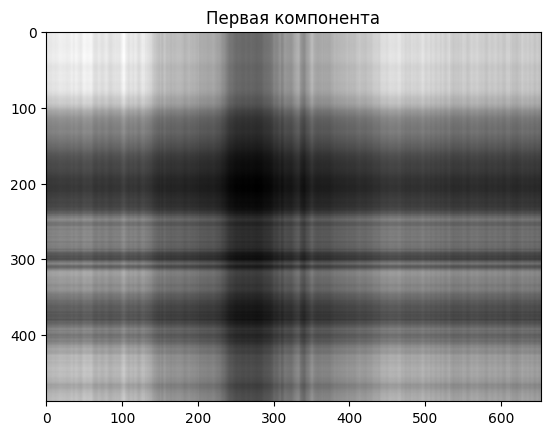

In [12]:
img_1=U[:,0:1]@(VT[0:1,:])
plt.imshow(img_1, cmap='gray')
plt.title('Первая компонента')
plt.show()

Я не ожидала такого результата, так как первое сингулярное значение матрицы Σ значительно превосходит остальные, и я думала, что отбрасывание остальных компонент не повлияет на качество изображения настолько сильно.

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

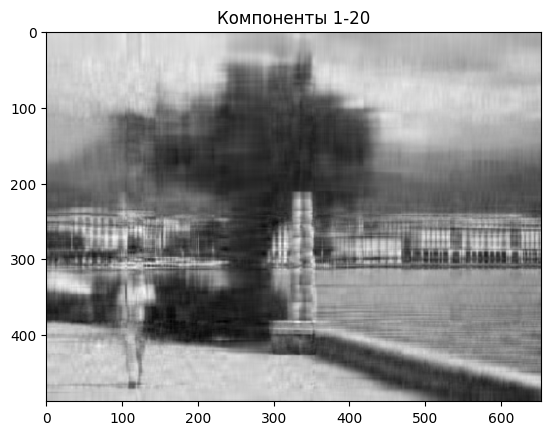

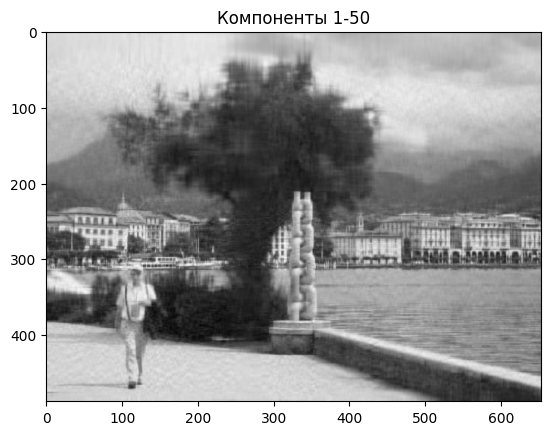

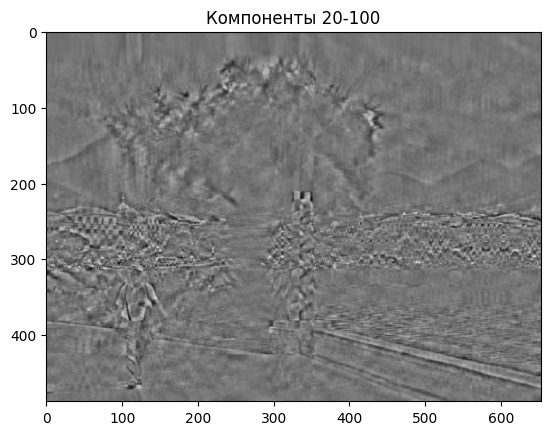

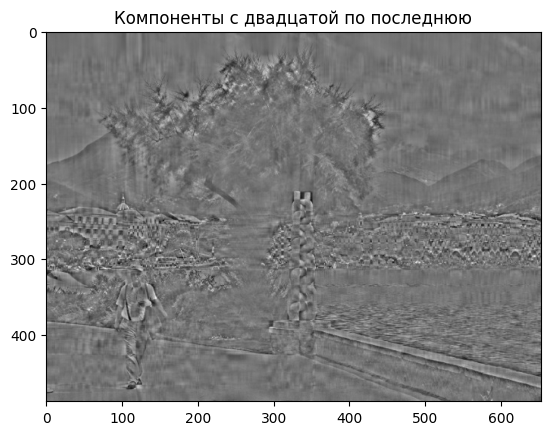

In [13]:
S_20=np.diag(S[0:20])
S_50=np.diag(S[0:50])
S_20_100=np.diag(S[19:100])
S_20_n=np.diag(S[19:n])
img_20=U[:,0:20]@S_20@VT[0:20,:]
img_50=U[:,0:50]@S_50@VT[0:50,:]
img_20_100=U[:,19:100]@S_20_100@VT[19:100,:]
img_20_n=U[:,19:n]@S_20_n@VT[19:n,:]
plt.imshow(img_20, cmap='gray')
plt.title('Компоненты 1-20')
plt.show()
plt.imshow(img_50, cmap='gray')
plt.title('Компоненты 1-50')
plt.show()
plt.imshow(img_20_100, cmap='gray')
plt.title('Компоненты 20-100')
plt.show()
plt.imshow(img_20_n, cmap='gray')
plt.title('Компоненты с двадцатой по последнюю')
plt.show()

Первая компонента ранга 1 передает общую структуру изображения, без детализации. Сумма первых 20 компонент восстанавливает изображение, сохраняя основные формы, а увеличение числа компонент до 50 добавляет больше деталей и улучшает качество. Компоненты с 20-й по 100-ю и далее содержат в основном шумы и мелкие детали, которые сами по себе не формируют четкую картинку. Таким образом, основная визуальная информация сосредоточена в первых нескольких десятках сингулярных компонент.

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Ясно, что сжатое изображение тем ближе к исходному, чем ближе их матрицы по заданной норме. При этом память, требуемая для хранения сжатого изображения, прямо пропорциональна рангу его матрицы. По теореме о низкоранговом приближении, наилучшее приближения ранга  𝑟  по норме Фробениуса -- сумма главных компонент  1,...,𝑟 . Значит, для решения задачи сжатия изображения с минимальными потерями стоит также взять сумму главных компонент с первой по r-ую для некоторого 1≤𝑟≤𝑟𝑘 , где  𝑟𝑘  -- ранг исходного изображения. Попробуем подобрать  𝑟 . Видно, что  𝑟=50  ещё недостаточно. Также видно, что r=200 даёт изображение, почти неотличимое от исходного. Перебрав промежуточные значения с шагом 25, оставим 𝑟=125 , так как дальнейшее повышение  𝑟  не даёт значимых изменений.



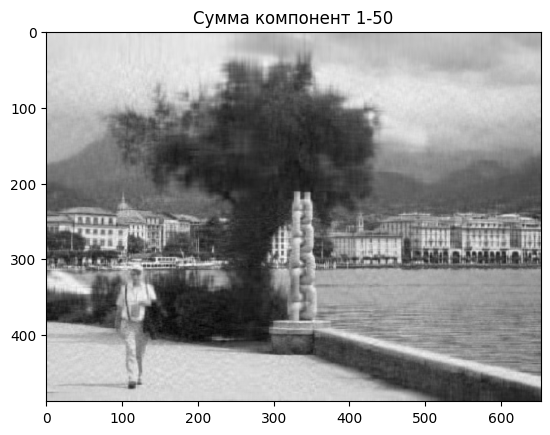

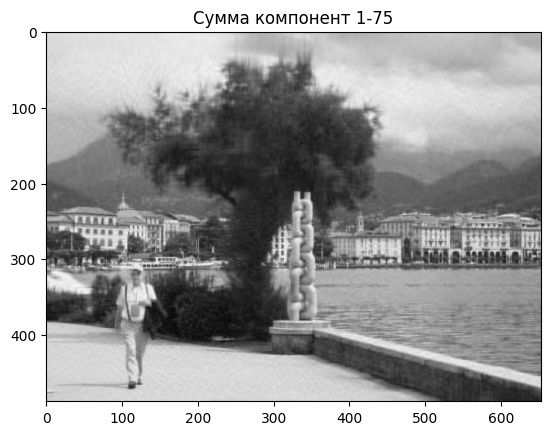

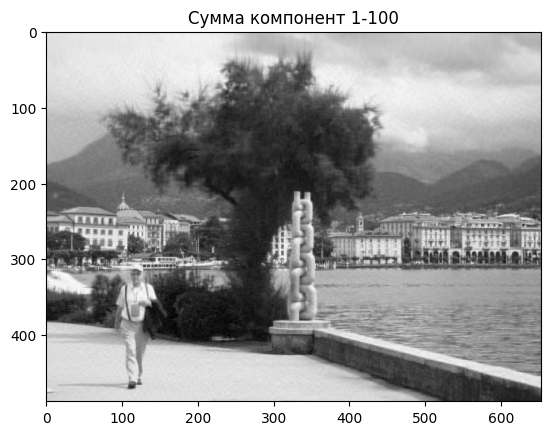

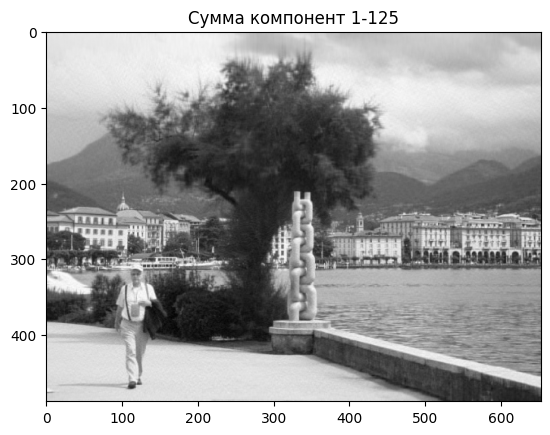

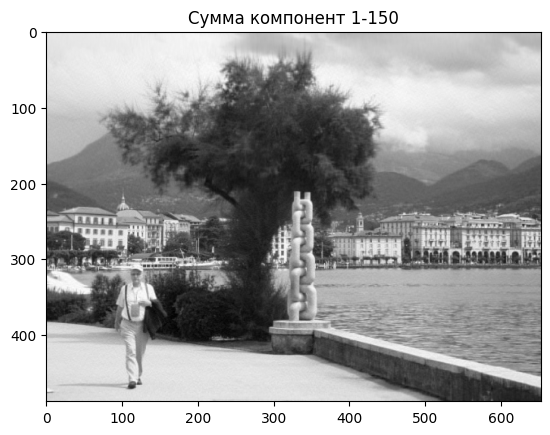

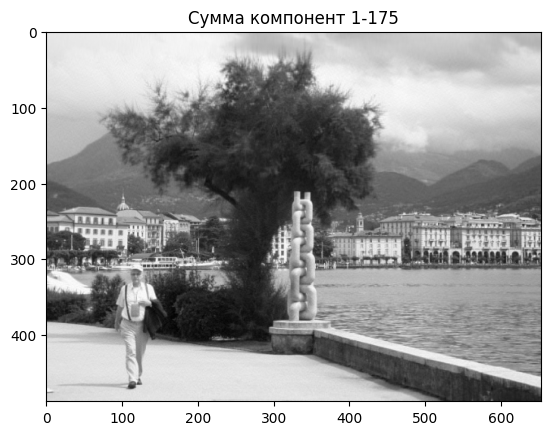

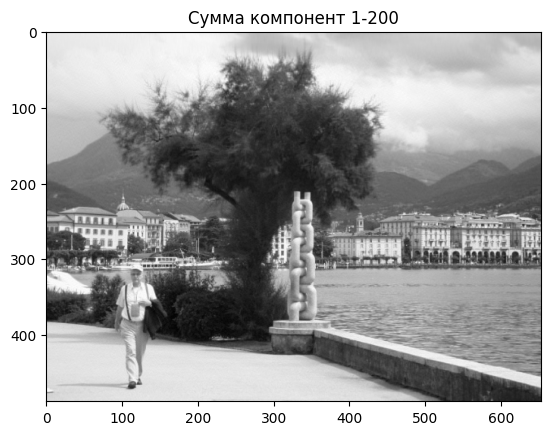

In [14]:
#Получение оптимального r
for r in range(50, 225, 25): #Циклы запрещены только для визуализации
  S_r=np.diag(S[0:r])
  img_r=U[:,0:r]@S_r@VT[0:r,:]
  plt.imshow(img_r, cmap='gray')
  plt.title(f'Сумма компонент 1-{r}')
  plt.show()

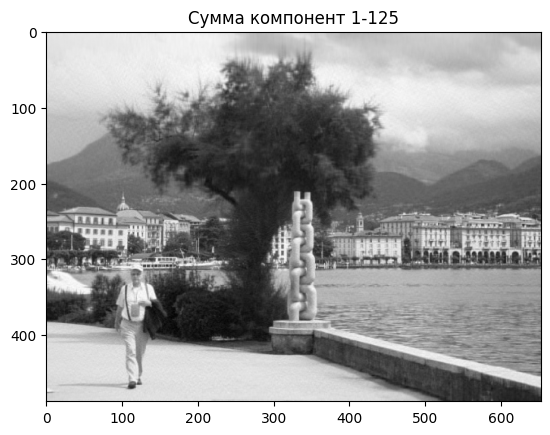

In [15]:
#Итог
r=125
S_r=np.diag(S[0:r])
img_r=U[:,0:r]@S_r@VT[0:r,:]
plt.imshow(img_r, cmap='gray')
plt.title(f'Сумма компонент 1-{r}')
plt.show()

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

In [16]:
m,n=np.shape(img)
print(m,n)
print(n*m)
print(r*(m+n+1))
print(318664/142750)

488 653
318664
142750
2.232322241681261


$m=488,n=653$ - размеры матрицы исходного изображения. Значит, для её хранения требуется $m*n=488*653=318664$ ячеек памяти. Для хранения первых 125 главных компонент требуется $r*(m+n+1)=125*(488+653+1)=142750
$ ячеек памяти, что в $318664/142750≈2,23$ раз меньше.

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [17]:
from sys import getsizeof
U_r=U[:,0:r].copy()
VT_r=VT[0:r,:].copy()
size=getsizeof(img)
size_merge=getsizeof(S_r)+getsizeof(U_r)+getsizeof(VT_r)
print('Размер исходного изображения: ', size)
print('Размер сжатого изображения: ', size_merge)
print('Сжатие :', size/size_merge)

Размер исходного изображения:  2549440
Размер сжатого изображения:  1266384
Сжатие : 2.0131650431464707


Видим, что на самом деле для хранения сжатого изображения требуется примерно в $2,01$ раза меньше памяти. Возможно, numpy оптимизирует хранение больших объектов в памяти.

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

1. Докажем первое равенство. Будем считать, что имеем дело с полным разложением. Пусть $\varphi: \mathbb{R}^n\to\mathbb{R}^m$ - линейное отображение, имеющее в паре стандартных базисов матрицу $X$.Так как $U,V$ ортогональны, имеем $Σ=U^{-1}XV=U^TXV$. Пусть $u_1,\dots, u_m$, $v_1,\dots, v_n$ - столбцы матриц $U, V$, $f=(u_1,\dots, u_m), e=(v_1,\dots, v_n)$. По свойствам сингулярного разложения, $A(\varphi,e,f)=Σ, \varphi(e_i)=σ_if_i\forall i=1,\dots, k$, где $k=rk \varphi$, $φ(e_i)=0\forall i>k$; системы $e,f$ --- ортонормированные базисы соответствующих пространств. Пусть $w=\begin{pmatrix}
w_1\\
\dots\\
w_n
\end{pmatrix}=x_1v_1+\dots+x_nv_n
$ . Тогда имеем $Xw=\varphi(w)=x_1φ(e_1)+\dots+x_n\varphi(e_n)=x_1σ_1u_1+\dots+x_kσ_ku_k\implies$ (так как базис $e$ ортонормирован) $|Xw|=\sqrt{σ_1^2x_1^2+\dots+σ_k^2x_k^2}\le \sqrt{σ_1^2x_1^2+\dots+σ_1^2x_n^2}=σ_1\sqrt{x_1^2+\dots+x_n^2}$. Кроме того, по формуле замены координат при переходе к новому базису $\begin{pmatrix}
w_1\\
\dots\\
w_n
\end{pmatrix}=U\begin{pmatrix}
x_1\\
\dots\\
x_n
\end{pmatrix}$. Так как имеем дело с $\mathbb{R}^n$, $(w,w)=\begin{pmatrix}
w_1\\
\dots\\
w_n
\end{pmatrix}^T\begin{pmatrix}
w_1\\
\dots\\
w_n
\end{pmatrix}=(x_1,\dots,x_n)U^TU\begin{pmatrix}
x_1\\
\dots\\
x_n
\end{pmatrix}=x_1^2+\dots+x_n^2$. Преобразовывая полученную выше оценку, $|Xw|\le σ_1\sqrt{x_1^2+\dots+x_n^2}=\sigma_1|w|\implies \frac{|Xw|}{|w|}\le σ_1$. При этом равенсто достигается, например, для $w=v_1$: имеем $|w|=1, Xw=σ_1u_1\implies |Xw|=σ_1=σ_1|w|$. Тогда получаем требуемое утверждение.


2. Докажем равенство $σ_1=max_{|w|=1}|Xw|$. Равенство $|Xw|=σ_1$ при условии $|w|=1$ достигается для $w=v_1$ (см. выше). Пусть $\exists w: |w|=1, |Xw|>σ_1$. Для такого $w$ получаем $|Xw|/|w|=|Xw|\implies \frac{|Xw|}{|w|}>σ_1$ - противоречие с предыдущим утверждением.


3. Докажем равенство  $\sigma_1 = \max_{\substack{|\mathbf{u}|=1 \\ |\mathbf{v}|=1}} |\mathbf{u}^T X \mathbf{v}|.$  Рассмотрим полное SVD-разложение матрицы $X$. Пусть $\varphi: \mathbb{R}^n \to \mathbb{R}^m$ — линейное отображение с матрицей $X$ в стандартных базисах. Так как матрицы $U,V$ ортогональны:  $\Sigma = U^{-1}XV = U^TXV.$  Пусть $\mathbf{u}_1,\dots,\mathbf{u}_m$ — столбцы $U$, $\mathbf{v}_1,\dots,\mathbf{v}_n$ — столбцы $V$. Системы $f=(\mathbf{u}_1,\dots,\mathbf{u}_m)$ и $e=(\mathbf{v}_1,\dots,\mathbf{v}_n)$ — ортонормированные базисы. По свойствам SVD:  $A(\varphi,e,f)=\Sigma, \quad \varphi(e_i)=\sigma_i f_i \quad \forall i=1,\dots,k,$  
где $k=\text{rk} \varphi$, и $\varphi(e_i)=0$ при $i>k$.  Для произвольных векторов:  $\mathbf{u} = \sum_{i=1}^m \alpha_i \mathbf{u}_i, \quad \mathbf{v} = \sum_{j=1}^n \beta_j \mathbf{v}_j,$  
где $\sum \alpha_i^2 = 1$, $\sum \beta_j^2 = 1$.  Тогда:  
$\mathbf{u}^T X \mathbf{v} = \mathbf{u}^T U \Sigma V^T \mathbf{v} = \alpha^T \Sigma \beta = \sum_{i=1}^k \sigma_i \alpha_i \beta_i.$  Оценим модуль: $|\mathbf{u}^T X \mathbf{v}| \leq \sum_{i=1}^k \sigma_i |\alpha_i| |\beta_i| \leq \sigma_1 \sum_{i=1}^k |\alpha_i| |\beta_i|.$  По неравенству Коши-Буняковского:  $\sum_{i=1}^k |\alpha_i| |\beta_i| \leq \sqrt{\sum \alpha_i^2} \sqrt{\sum \beta_i^2} \leq 1.$  Следовательно:  $|\mathbf{u}^T X \mathbf{v}| \leq \sigma_1.$  Равенство достигается при $\mathbf{u}=\mathbf{u}_1$, $\mathbf{v}=\mathbf{v}_1$:  $|\mathbf{u}_1^T X \mathbf{v}_1| = |\mathbf{u}_1^T U \Sigma V^T \mathbf{v}_1| = \sigma_1.$  Таким образом:  $\sigma_1 = \max_{\substack{|\mathbf{u}|=1 \\ |\mathbf{v}|=1}} |\mathbf{u}^T X \mathbf{v}|.$  Для вектора $\mathbf{w} = \sum x_i \mathbf{v}_i$:  $X\mathbf{w} = \sum_{i=1}^k x_i\sigma_i \mathbf{u}_i \implies |X\mathbf{w}| \leq \sigma_1|\mathbf{w}|.$ Равенство при $\mathbf{w}=\mathbf{v}_1$:  $|X\mathbf{v}_1| = \sigma_1 = \sigma_1|\mathbf{v}_1|.$

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$.

Заметим, что $A=\begin{pmatrix}
\sin 0\\
\sin 1\\
\vdots\\
\sin (n-1)
\end{pmatrix}\begin{pmatrix}\cos 0 & \cos 1 & \dots & \cos (n-1)\end{pmatrix}=uv^T$, где $u=\begin{pmatrix}
\sin 0\\
\sin 1\\
\vdots\\
\sin (n-1)
\end{pmatrix},v=\begin{pmatrix}\cos 0 \\ \cos 1 \\ \vdots \\ \cos (n-1)\end{pmatrix}$ - векторы из $\mathbb{R}^n$.  Из существования такого разложения следует, что ранг $A$ равен 1 (обсуждалось на лекциях). Заметим также, что $|u|=\sin^20+\dots+\sin^2(n-1), |v|=\cos^20+\dots+\cos^2(n-1)$. Значит, $U=\frac{1}{\sqrt{\sin^20+\dots+\sin^2(n-1)}}u=\begin{pmatrix}
\frac{\sin 0}{\sqrt{\sin^20+\dots+\sin^2(n-1)}}\\
\frac{\sin 1}{\sqrt{\sin^20+\dots+\sin^2(n-1)}}\\
\vdots\\
\frac{\sin (n-1)}{\sqrt{\sin^20+\dots+\sin^2(n-1)}}
\end{pmatrix}, V=\frac{1}{\sqrt{\cos^20+\dots+\cos^2(n-1)}}v=\begin{pmatrix}
\frac{\cos 0}{\sqrt{\cos^20+\dots+\cos^2(n-1)}}\\
\frac{\cos 1}{\sqrt{\cos^20+\dots+\cos^2(n-1)}}\\
\vdots\\
\frac{\cos (n-1)}{\sqrt{\cos^20+\dots+\cos^2(n-1)}}
\end{pmatrix}$ - матрицы с ортонормированными столбцами (система из ненулевого вектора ортогональна, каждый из столбцов поделили на его модуль). При этом $A=uv^T=\sqrt{\sin^20+\dots+\sin^2(n-1)}\sqrt{\cos^20+\dots+\cos^2(n-1)}UV^T=\begin{pmatrix}
\frac{\sin 0}{\sqrt{\sin^20+\dots+\sin^2(n-1)}}\\
\frac{\sin 1}{\sqrt{\sin^20+\dots+\sin^2(n-1)}}\\
\vdots\\
\frac{\sin (n-1)}{\sqrt{\sin^20+\dots+\sin^2(n-1)}}
\end{pmatrix}\begin{pmatrix}
\sqrt{\sin^20+\dots+\sin^2(n-1)}\sqrt{\cos^20+\dots+\cos^2(n-1)}
\end{pmatrix}\begin{pmatrix}
\frac{\cos 0}{\sqrt{\cos^20+\dots+\cos^2(n-1)}}\\
\frac{\cos 1}{\sqrt{\cos^20+\dots+\cos^2(n-1)}}\\
\vdots\\
\frac{\cos (n-1)}{\sqrt{\cos^20+\dots+\cos^2(n-1)}}
\end{pmatrix}^T$.

 Это и будет Compact SVD: все требования выполнены.

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

Так как $U,V$ ортогональны, имеем $Σ=U^{-1}AV=U^TAV$. Пусть $u_1,\dots, u_m$, $v_1,\dots, v_n$ - столбцы матриц $U, V$, $u=(u_1,\dots, u_m), v=(v_1,\dots, v_n)$. По свойствам сингулярного разложения, $A(\mathcal{A},v,u)=Σ$, $\Sigma=\begin{pmatrix}
σ_1 & 0 & \dots & 0 & \dots & 0\\
0 & σ_2 & \dots & 0 & \dots & 0\\
\vdots & \vdots & \ddots & \vdots & \ddots & \vdots\\
0 & 0 & \dots & σ_r & \dots & 0\\
\vdots & \vdots & \ddots & \vdots & \ddots & \vdots\\
0 & 0 & \dots & 0 & \dots & 0\\
\end{pmatrix}$, системы $e,f$ - ортонормированные базисы соответствующих пространств. Рассмотрим произвольный $i>r$. В $i$-м столбце матрицы $Σ$ по построению матрицы линейного отображения записаны координаты $v_i$ в базисе $u$. Так как столбцы $Σ$ правее $r$-того нулевые, $\mathcal{A}(v_i)=0$. Тогда $\ker\mathcal{A} \supseteq \langle v_{r+1},\dots,v_n\rangle$. Из общих фактов о линейных отображениях, $\dim Im \mathcal{A}=rk\; A=r\implies \dim ker \mathcal{A}=n-\dim Im\mathcal{A}=n-r$. Значит в последнем включении достигается равенство: $\ker\mathcal{A} = \langle v_{r+1},\dots,v_n\rangle$. Из общих фактов о линейных отображениях, $Im \mathcal{A}=\langle \mathcal{A}(v_1),\dots,\mathcal{A}(v_n)\rangle=\langle σ_1 u_1,\dots,σ_ru_r,0,\dots,0\rangle=\langle u_1,\dots,u_r\rangle$

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

Пусть $A = U \Sigma V^T$ - полное сингулярное разложение. $A^TA=VΣ^TU^TUΣV^T=VΣ^TΣV^T$. Так как столбцы $A$ линейно независимы $\det A^TA>0$ ($A^TA$ - матрицы Грама столбцов $A$), а также $rk A=n$. Так как $rk A=n$, $Σ$ имеет вид $\begin{pmatrix}
σ_1 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & σ_n\\
0 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & 0\\
\end{pmatrix}$. Пользуясь блочным умножением матриц, $Σ^TΣ=\begin{pmatrix}
σ_1^2 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & σ_n^2\\
\end{pmatrix}
\implies (Σ^TΣ)^{-1}=\begin{pmatrix}
1/σ_1^2 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & 1/σ_n^2\\
\end{pmatrix}$. Пользуясь формулой обратной матрицы для произведения, $(A^TA)^{-1}=(VΣ^TΣV^T)^{-1}=(V^T)^{-1}(Σ^TΣ)^{-1}V^{-1}=V\begin{pmatrix}
1/σ_1^2 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & 1/σ_n^2\\
\end{pmatrix}V^T$. Значит $P=UΣV^TV\begin{pmatrix}
1/σ_1^2 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & 1/σ_n^2\\
\end{pmatrix}V^TVΣ^TU^T=UΣ\begin{pmatrix}
1/σ_1^2 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & 1/σ_n^2\\
\end{pmatrix}Σ^TU^T$. Пользуясь фактом об умножении матрицы на диагональную, $Σ\begin{pmatrix}
1/σ_1^2 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & 1/σ_n^2\\
\end{pmatrix}=\begin{pmatrix}
σ_1 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & σ_n\\
0 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & 0\\
\end{pmatrix}\begin{pmatrix}
1/σ_1^2 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & 1/σ_n^2\\
\end{pmatrix}=\begin{pmatrix}
1/σ_1 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & 1/σ_n\\
0 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & 0\\
\end{pmatrix}$. Тогда $Σ\begin{pmatrix}
1/σ_1^2 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & 1/σ_n^2\\
\end{pmatrix}Σ^T=\begin{pmatrix}
1/σ_1 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & 1/σ_n\\
0 & \dots & 0\\
\vdots & \ddots & \vdots\\
0 & \dots & 0\\
\end{pmatrix}\begin{pmatrix}
σ_1 & \dots & 0 & 0 & \dots & 0\\
\vdots & \ddots & \vdots & \vdots & \ddots & \vdots\\
0 & \dots & σ_n & 0 & \dots & 0
\end{pmatrix}=\begin{pmatrix}
1 & \dots & 0 & \dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & 1 & \dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & 0 & \dots & 0\\
\end{pmatrix}
\in M_m(\mathbb{R})$, где единичной матрицей будет левый верхний $n\times n$ блок. Итого, $P=U\begin{pmatrix}
1 & \dots & 0 & \dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & 1 & \dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & 0 & \dots & 0\\
\end{pmatrix}U^T$. Заметим, что это и будет сингулярным разложнием: $\begin{pmatrix}
1 & \dots & 0 & \dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & 1 & \dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & 0 & \dots & 0\\
\end{pmatrix}$ диагональна с упорядоченными числами на диагонали, $U$ ортогональна. Тогда $\begin{pmatrix}
1 & \dots & 0 & \dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & 1 & \dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & 0 & \dots & 0\\
\end{pmatrix}$ - искомая.

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


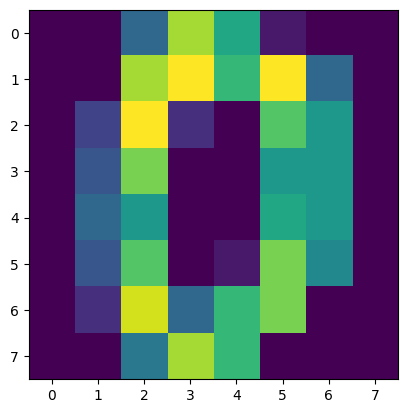

(1797, 64)

In [18]:
from sklearn import datasets

digits = datasets.load_digits()
print(digits.target[0])
plt.imshow(digits.data[0].reshape((8,8)))
plt.show()
digits.data.shape

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [19]:
U, S, Vt=svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

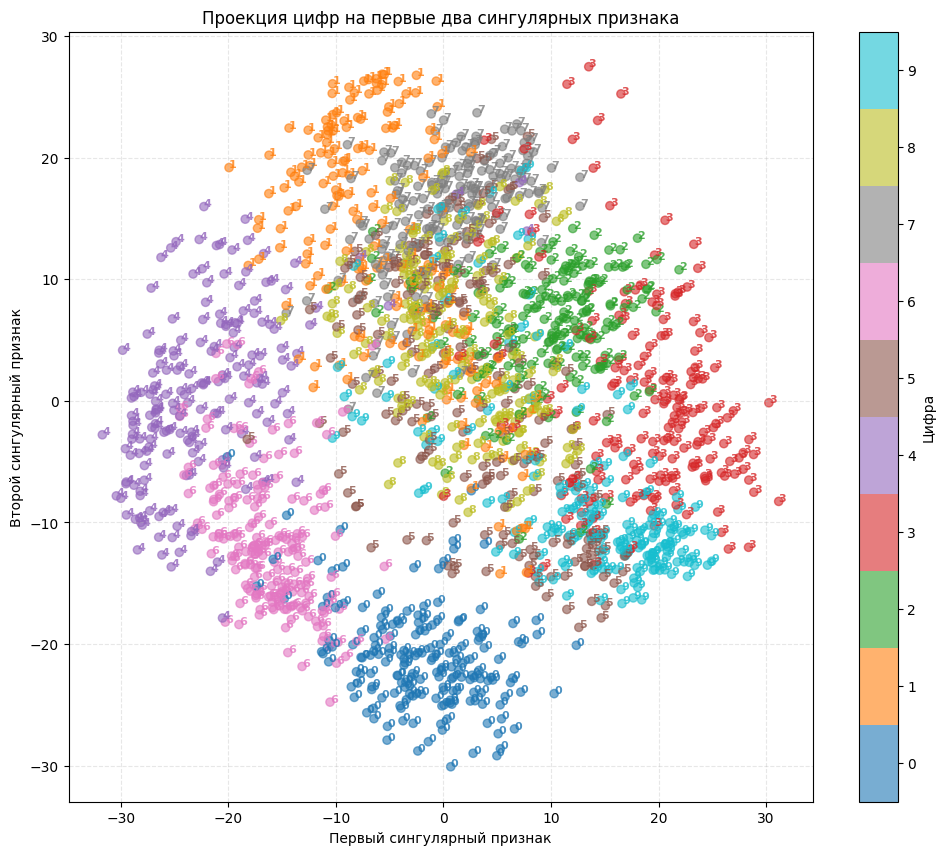

In [25]:
X_projected = U[:, :2] * S[:2]
plt.figure(figsize=(12, 10))

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=digits.target, cmap='tab10', alpha=0.6)
plt.colorbar(label='Цифра', ticks=range(10))
plt.clim(-0.5, 9.5)
for i in range(digits.data.shape[0]):
    plt.text(X_projected[i, 0], X_projected[i, 1], str(digits.target[i]),
             color=plt.cm.tab10(digits.target[i] / 10.),
             fontdict={'weight': 'bold', 'size': 8},
             alpha=0.8)

plt.title('Проекция цифр на первые два сингулярных признака')
plt.xlabel('Первый сингулярный признак')
plt.ylabel('Второй сингулярный признак')
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

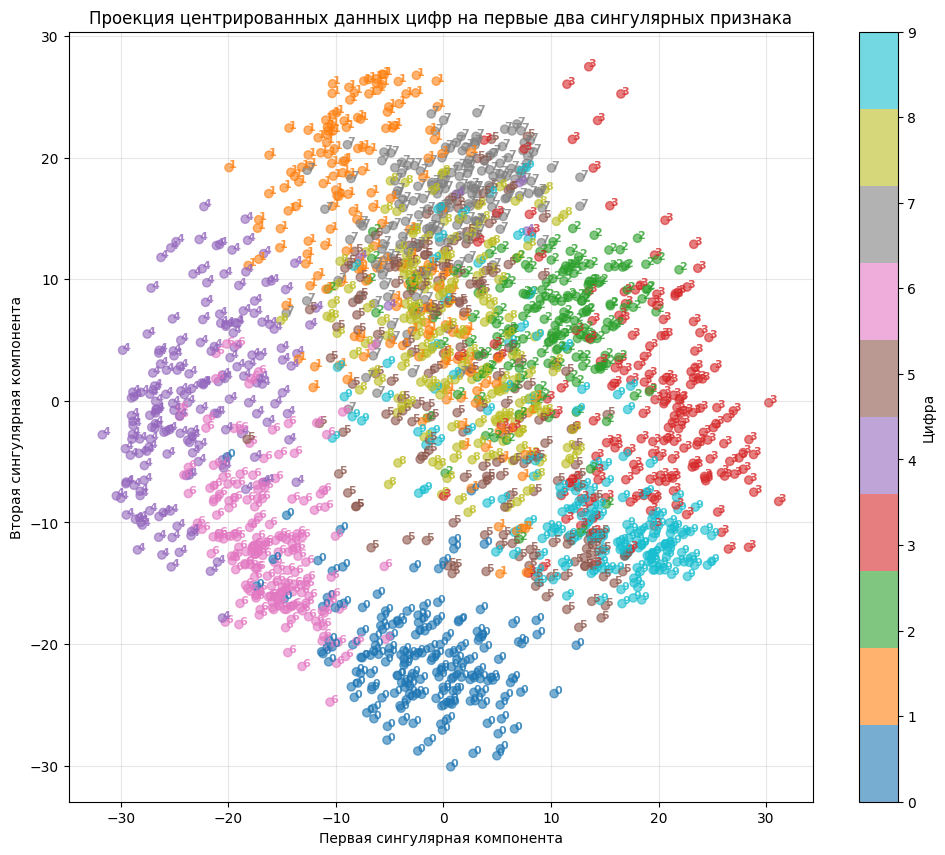

In [24]:
X = digits.data
y = digits.target
X_centered = X - np.mean(X, axis=0)
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

X_projected = U[:, :2] * S[:2]

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, cmap='tab10', alpha=0.6)
for i in range(X.shape[0]):
    plt.text(X_projected[i, 0], X_projected[i, 1], str(y[i]),
             color=plt.cm.tab10(y[i]/10.),
             fontdict={'weight': 'bold', 'size': 8},
             alpha=0.8)
cbar = plt.colorbar(scatter)
cbar.set_ticks(range(10))
cbar.set_label('Цифра')
plt.title('Проекция центрированных данных цифр на первые два сингулярных признака')
plt.xlabel('Первая сингулярная компонента')
plt.ylabel('Вторая сингулярная компонента')
plt.grid(alpha=0.3)
plt.show()

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?


На первой визуализации точки, соответствующие одинаковым цифрам, а также сами цифры, могут быть сильно разбросаны по всему графику (например, точки, обозначающие единицу, широко «размазаны» по центру изображения). На втором графике точки, принадлежащие одним и тем же цифрам, отчётливо сгруппированы, хотя отдельные выбросы всё же встречаются. Кроме того, группы точек, соответствующих похожим цифрам, расположены близко друг к другу (например, группы, обозначающие цифры 1, 7 и 4).

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

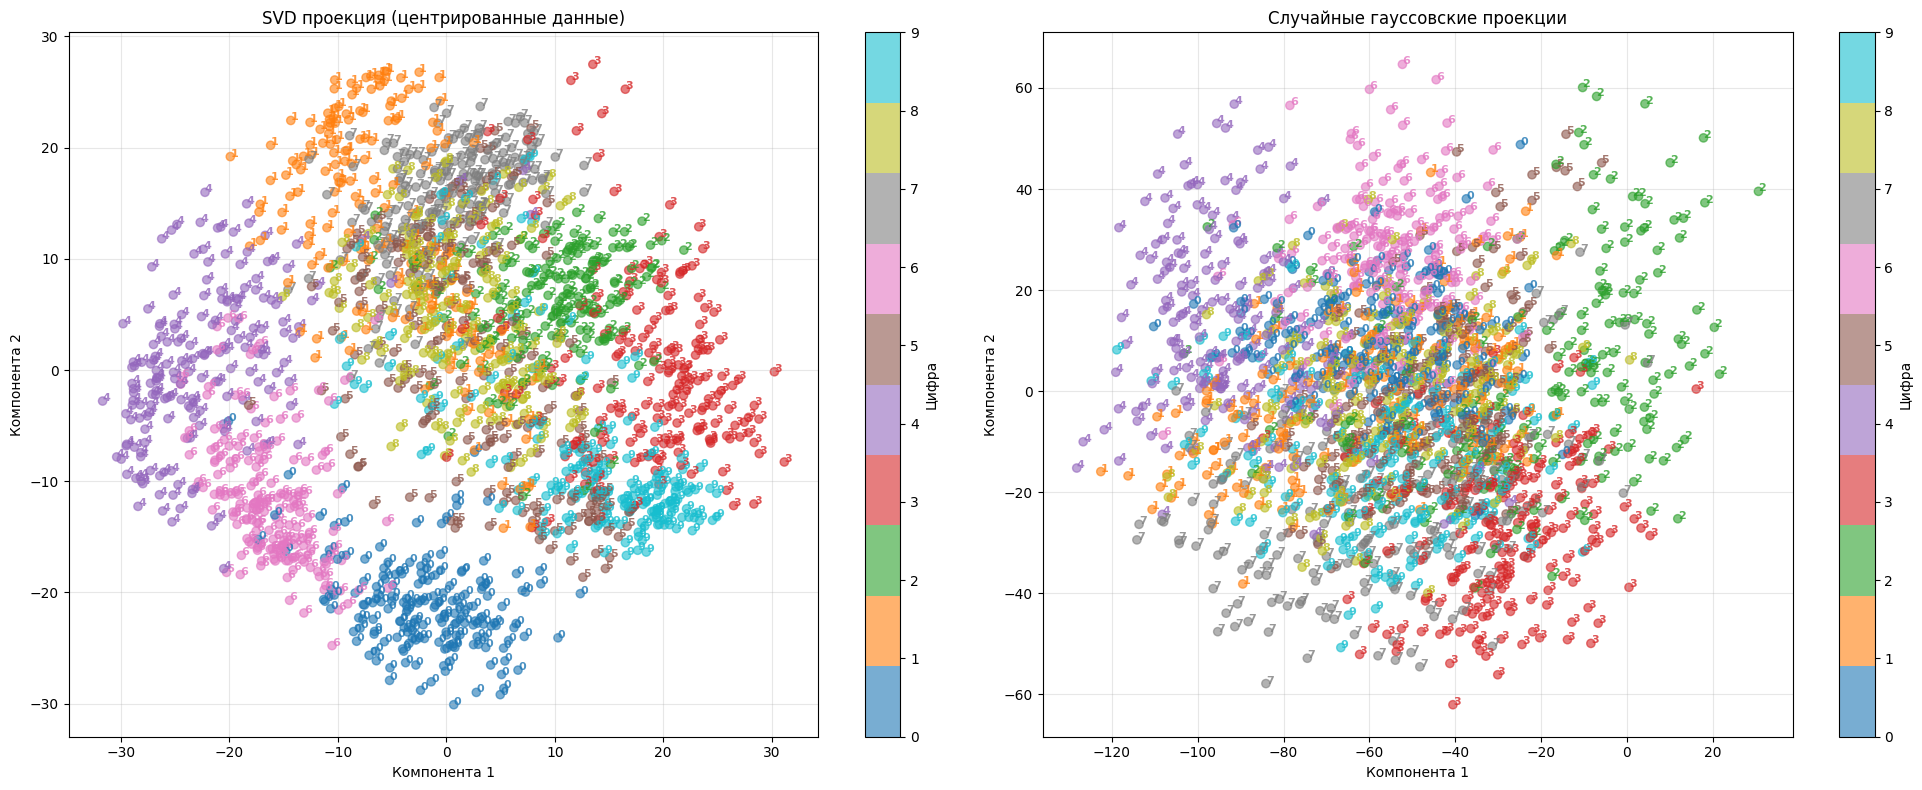


Метрики качества:
SVD Silhouette Score: 0.105
RP Silhouette Score: -0.040

Время выполнения:
SVD: 0.0077 сек
RP: 0.0023 сек


In [23]:
from sklearn.random_projection import GaussianRandomProjection
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_centered = X - np.mean(X, axis=0)
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
X_svd = U[:, :2] * S[:2]
rp = GaussianRandomProjection(n_components=2, random_state=42)
X_rp = rp.fit_transform(X)
def plot_digits_projection(X_proj, title, ax):
    scatter = ax.scatter(X_proj[:, 0], X_proj[:, 1], c=y, cmap='tab10', alpha=0.6)
    for i in range(X.shape[0]):
        ax.text(X_proj[i, 0], X_proj[i, 1], str(y[i]),
                color=plt.cm.tab10(y[i]/10.),
                fontdict={'weight': 'bold', 'size': 8},
                alpha=0.8)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_ticks(range(10))
    cbar.set_label('Цифра')
    ax.set_title(title)
    ax.set_xlabel('Компонента 1')
    ax.set_ylabel('Компонента 2')
    ax.grid(alpha=0.3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

plot_digits_projection(X_svd, 'SVD проекция (центрированные данные)', ax1)
plot_digits_projection(X_rp, 'Случайные гауссовские проекции', ax2)

plt.tight_layout()
plt.show()

from sklearn.metrics import silhouette_score

print("\nМетрики качества:")
print(f"SVD Silhouette Score: {silhouette_score(X_svd, y):.3f}")
print(f"RP Silhouette Score: {silhouette_score(X_rp, y):.3f}")

import time

start = time.time()
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
svd_time = time.time() - start

start = time.time()
rp = GaussianRandomProjection(n_components=2, random_state=42).fit_transform(X)
rp_time = time.time() - start

print("\nВремя выполнения:")
print(f"SVD: {svd_time:.4f} сек")
print(f"RP: {rp_time:.4f} сек")

1. SVD осознанно проецирует данные так, чтобы максимально сохранить расстояния между точками.RP проецирует данные случайно, сохраняя расстояния лишь примерно. Из-за этого при RP точки лежат в размытой куче, а при SVD четко видны отдельные кластеры, соответствующие разным цифрам
2. SVD сохраняет глобальную структуру данных, точки внутри кластеров ближе друг к другу, чем к другим кластерам. RP Сохраняет расстояния приблизительно и может перемешать данные, если проекция неудачная. Поэтому у SVD Silhouette Score (качество) выше, чем у RP
3. Пусть мы разлагаем матрицу $X_{n\times d}$. Тогда сложность SVD $= O(\min(n^2d, nd^2))$ - зависит от того, строк или столбцов больше. RP умножает матрицу $X_{n \times d}$ на случайную матрицу $R_{d \times k}$, тогда сложность RP $=O(ndk)$. При больших $n, d: $ RP будет значительно быстрее, чем SVD, что также подтверждается экспериментом

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$:

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [31]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

<ipython-input-32-5545a14a65cb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-32-5545a14a65cb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-32-5545a14a65cb>:14: UserWarning: 

`distplot` is a

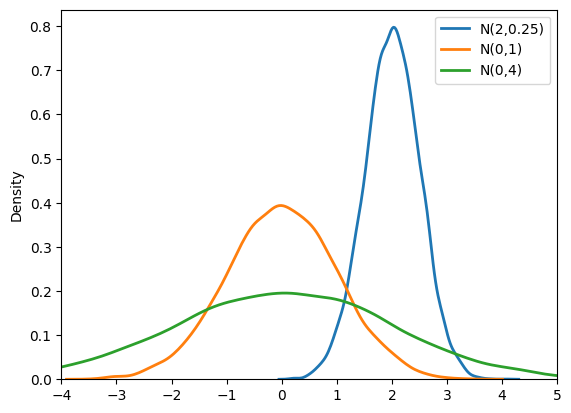

In [32]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат.
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<ipython-input-38-d724289f70c9>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=s[:, 0], y=s[:, 1], shade=False, color='g')


<Axes: >

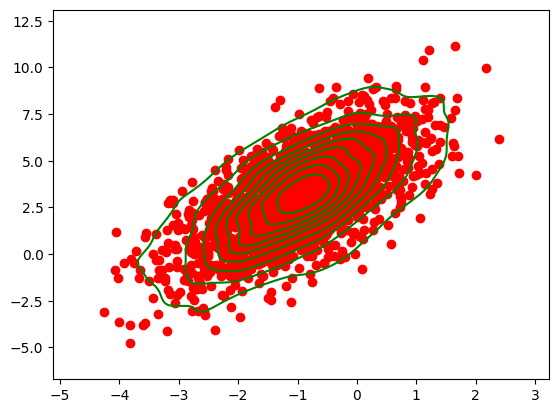

In [38]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(x=s[:, 0], y=s[:, 1], shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [26]:
N = 1000
s = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

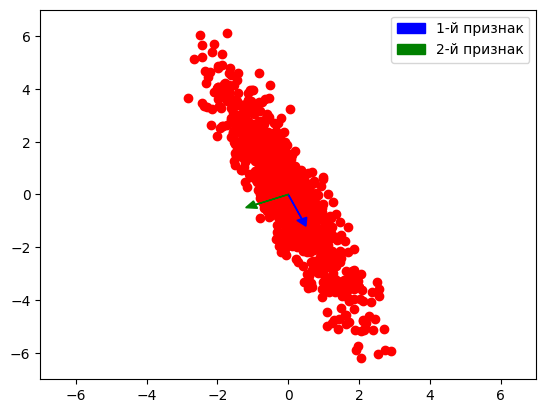

In [27]:
plt.scatter(s[:,0], s[:,1], color='red')
U,S,Vt=svd(s, full_matrices=False)
s_new=U@np.diag(S)[:,0:2]
V=Vt
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.arrow(0,0 , V[0][0], V[0][1], color='b', label='1-й признак', head_width=0.3, head_length=0.3,
           width=0.01
          )
plt.arrow(0,0 , V[1][0], V[1][1],color='g', label='2-й признак', head_width=0.3, head_length=0.3,
          width=0.01
          )
plt.legend()
plt.show()

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

Так как имеем дело со стандартным скалярным произведением, стандартный базис ортонормирован. Рассмотрим линейный оператор $\varphi$, имеющий в стандартном базисе матрицу $Σ$. $\chi_{φ}(t)=\begin{vmatrix}
1-t & -2\\
-2 & 5-t
\end{vmatrix}=(1-t)(5-t)-4=t^2-6t+1$. $\chi_{φ}(t)$ имеет корни $3-2\sqrt{2}, 3+2\sqrt{2}\implies$ у $\varphi$ 2 собственных значения: $3-2\sqrt{2}, 3+2\sqrt{2}$.

Базис $V_{3-2\sqrt{2}}$ - ФСР системы $(Σ-(3-2\sqrt{2})E)x=0$. Расширенная матрица системы:

$\begin{pmatrix}
2\sqrt{2}-2 & -2 & 0\\
-2 & 2\sqrt{2}+2 & 0
\end{pmatrix}=>\text{УСВ}\begin{pmatrix}
1 & -\sqrt{2}-1 & 0 \\
0 & 0 & 0
\end{pmatrix}\implies e_1=\begin{pmatrix}
\frac{\sqrt{2}+1}{\sqrt{4+2\sqrt{2}}}\\
\frac{1}{\sqrt{4+2\sqrt{2}}}
\end{pmatrix}$ - ортонормированный базис $V_{3-2\sqrt{2}}$

Базис $V_{3+2\sqrt{2}}$ - ФСР системы $(Σ-(3+2\sqrt{2})E)x=0$. Расширенная матрица системы:

$\begin{pmatrix}
-2\sqrt{2}-2 & -2 & 0\\
-2 & -2\sqrt{2}+2 & 0
\end{pmatrix}=>\text{УСВ}\begin{pmatrix}
1 & \sqrt{2}-1 & 0 \\
0 & 0 & 0
\end{pmatrix}\implies e_2=\begin{pmatrix}
\frac{1-\sqrt{2}}{\sqrt{4-2\sqrt{2}}}\\
\frac{1}{\sqrt{4-2\sqrt{2}}}
\end{pmatrix}$ - ортонормированный базис $V_{3+2\sqrt{2}}$

По доказанному на лекциях, $(e_1,e_2)=f*C=f*\begin{pmatrix}
\frac{\sqrt{2}+1}{\sqrt{4+2\sqrt{2}}} & \frac{1-\sqrt{2}}{\sqrt{4-2\sqrt{2}}}\\
\frac{1}{\sqrt{4+2\sqrt{2}}} & \frac{1}{\sqrt{4-2\sqrt{2}}}
\end{pmatrix}
$, где $f$ - стандартный базис, - ортонормированный базис $\mathbb{R}^2$, в котором матрица $\varphi$ имеет вид $\begin{pmatrix}
-2\sqrt{2}+3 & 0 \\
0 & 2\sqrt{2}+3
\end{pmatrix}$, то есть $C^{-1}ΣC=\begin{pmatrix}
-2\sqrt{2}+3 & 0 \\
0 & 2\sqrt{2}+3
\end{pmatrix}$. В этом базисе ковариоционная матрица имеет вид $C^TΣC=C^{-1}ΣC=\begin{pmatrix}
-2\sqrt{2}+3 & 0 \\
0 & 2\sqrt{2}+3
\end{pmatrix}$. Тогда главные оси - $\langle e_1\rangle,⟨e_2⟩=\langle \begin{pmatrix}
1+\sqrt{2}\\
1
\end{pmatrix}\rangle,⟨\begin{pmatrix}
1-\sqrt{2}\\
1
\end{pmatrix}⟩$

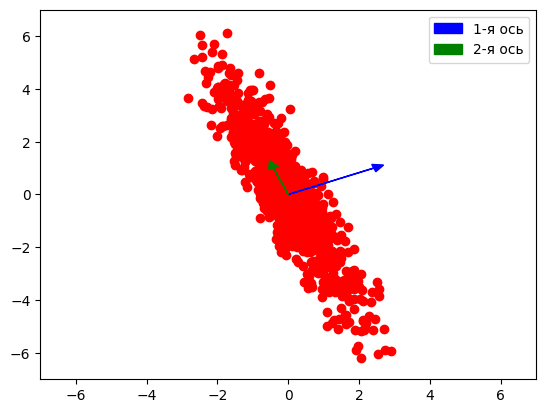

In [28]:
x1,x2,y1,y2=1+2**(0.5),1-2**(0.5), 1, 1
plt.scatter(s[:,0], s[:,1], color='red')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.arrow(0,0 , x1, y1, color='b', label='1-я ось', head_width=0.3, head_length=0.3,
           width=0.01)
plt.arrow(0,0 , x2, y2,color='g', label='2-я ось', head_width=0.3, head_length=0.3,
           width=0.01)
plt.legend()
plt.show()

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже.

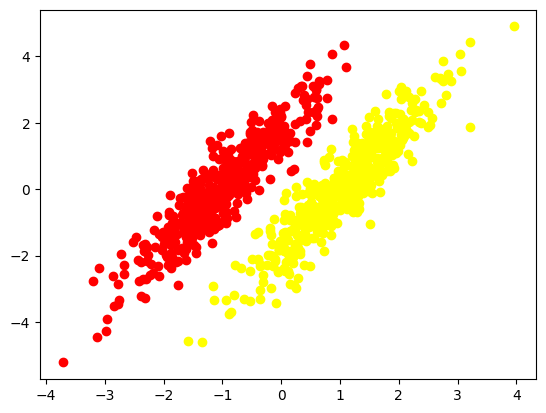

In [29]:
N = 500
covar=np.array([[0.6,1],[1,2]])
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=covar, size=N)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=covar, size=N)
s=np.concatenate((s1,s2))
plt.scatter(s1[:,0], s1[:,1], color='red')
plt.scatter(s2[:,0], s2[:,1], color='yellow')
plt.show()

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

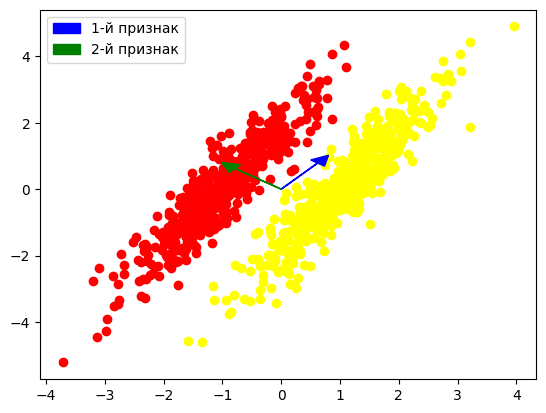

In [30]:
U,S,Vt=svd(s, full_matrices=False)
V=Vt
plt.scatter(s1[:,0], s1[:,1], color='red')
plt.scatter(s2[:,0], s2[:,1], color='yellow')
plt.arrow(0,0 , V[0][0], V[0][1], color='b', label='1-й признак', head_width=0.3, head_length=0.3,
           width=0.01
          )
plt.arrow(0,0 , V[1][0], V[1][1],color='g', label='2-й признак', head_width=0.3, head_length=0.3,
          width=0.01
          )
plt.legend()
plt.show()

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

По графику видно, что 2-й признак направлен в сторону одного из эллипсов (в примере выше - в сторону левого, зависит от конкрентного примера), соответственно положив $f(x)=(x,v_2), c=0$, где $v_2$ - вектор, соответствующий второму признаку, скалярное произведение - стандартное, можно получить метод распределения объектов в 2 класса: скалярное произведение будет положительным для точек из эллипса, в сторону которого указывает признак и отрицательным для другого.

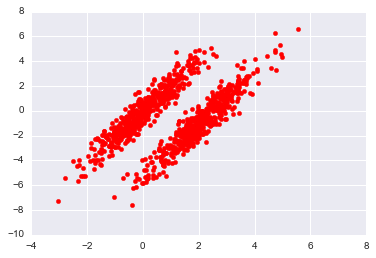

In [ ]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

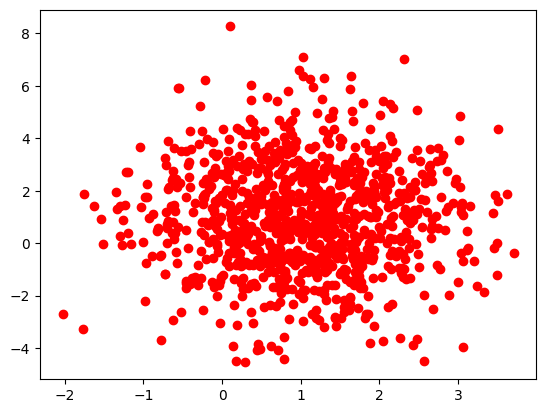

In [43]:
N=1000
s = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
plt.show()

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Выше убедились, что направления полуосей эллипса-облака точек совпадают с направлениями "главных осей" - линейных оболочек векторов базиса, в котором матрица ковариацци диагональна. В данном случае матрица ковариации диагональна в исходном - стандартном - базисе. Значит, направления полуосей эллипса-облака точек совпадают с направлениями векторов стандартного базиса - осью $Ox$ и осью $Oy$.

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

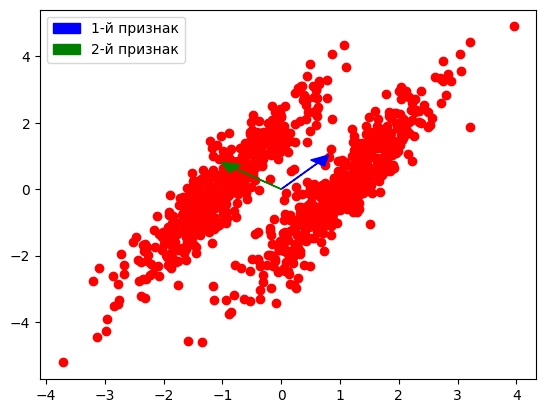

In [31]:
U,S,Vt=svd(s, full_matrices=False)
V=Vt
plt.scatter(s[:,0], s[:,1], color='red')
plt.arrow(0,0 , V[0][0], V[0][1], color='b', label='1-й признак', head_width=0.3, head_length=0.3,
           width=0.01
          )
plt.arrow(0,0 , V[1][0], V[1][1],color='g', label='2-й признак', head_width=0.3, head_length=0.3,
          width=0.01
          )
plt.legend()
plt.show()

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

SVD на не центрированных данных захватывает в первую очередь сдвиг (смещение) выборки, а не именно структуру ковариации.
В результате чего первый признак часто направлен в сторону среднего вектора, а не в направлении максимальной дисперсии. Это искажает интерпретацию главных компонент и не отражает реальную форму распределения данных. Чтобы исправить это, можно предварительно центрировать данные, то есть вычесть из каждого признака его среднее значение. Тогда SVD будет выявлять именно направления максимальной дисперсии, которые совпадают с главными осями ковариационной матрицы.